In [1]:
# Import Libraries
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import pandas_ml as pdml
import sklearn.datasets as datasets
import xgboost as xgb

In [24]:
# load data
dataset = ("..\data\Wine data red and white.csv")
df = pd.read_csv(dataset)

In [25]:
df = pdml.ModelFrame(datasets.load_digits())

In [26]:
df.head()

,.target,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df.xgboost.XGBClassifier

xgboost.sklearn.XGBClassifier

In [6]:
df.xgboost.XGBRegressor

xgboost.sklearn.XGBRegressor

In [7]:
train_df, test_df = df.model_selection.train_test_split()

In [21]:
len(test_df)

450

In [8]:
estimator = df.xgboost.XGBClassifier()

In [9]:
train_df.fit(estimator)
XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [23]:
train_predicted = train_df.predict(estimator)
train_predicted

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


728     6
1282    9
1661    4
498     7
1460    3
1047    8
1578    5
718     0
735     3
846     1
1781    8
909     4
1271    8
1391    6
692     5
1521    6
1099    0
1654    2
882     6
1205    0
1272    2
1583    8
806     0
664     8
860     2
276     0
286     0
1382    6
1396    5
1127    4
       ..
1214    2
521     5
945     8
350     7
1125    3
474     6
826     2
690     7
1064    5
1611    4
186     1
951     5
1732    6
1350    3
363     1
1794    8
225     4
1364    2
1669    2
1240    3
916     1
1513    3
716     1
1154    8
1761    7
1219    3
1200    7
645     8
1504    3
335     0
Length: 1347, dtype: int32

In [10]:
predicted = test_df.predict(estimator)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
predicted

983     7
1751    2
1471    1
850     5
1617    5
122     8
0       0
1737    1
246     5
1786    9
1002    0
962     3
1579    0
1399    7
963     7
1135    7
641     9
19      3
730     2
1234    2
797     1
917     2
1128    0
294     8
1514    0
328     0
1011    4
555     9
807     9
771     9
       ..
1120    1
395     9
906     1
1294    7
1558    3
1612    9
1023    4
1484    9
1213    1
1077    0
1201    7
647     1
1586    7
610     7
252     0
293     9
463     2
614     3
62      3
113     2
97      4
1176    9
1604    7
932     7
1244    4
1192    5
885     5
1598    0
1131    6
285     9
Length: 450, dtype: int32

In [12]:
test_df.metrics.confusion_matrix()

Predicted,0,1,2,3,4,5,6,7,8,9
Target,,,,,,,,,,
0,50,0,0,0,1,0,0,0,0,0
1,1,47,1,0,0,0,0,0,0,1
2,0,0,44,0,0,0,0,0,1,0
3,0,0,0,34,0,0,0,0,1,0
4,0,0,0,0,45,0,0,0,0,0
5,0,0,0,0,0,42,0,0,0,2
6,0,2,0,0,1,1,50,0,1,0
7,0,0,0,0,1,0,0,39,0,0
8,0,2,0,0,0,0,0,1,28,2


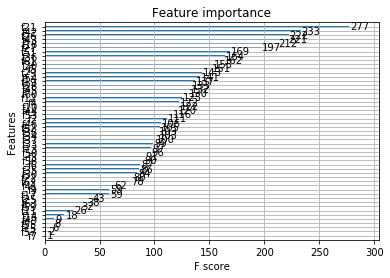

In [17]:
train_df.xgboost.plot_importance()
# importance plot will be displayed

In [18]:
tuned_parameters = [{'max_depth': [3, 4]}]
cv = df.model_selection.GridSearchCV(df.xgb.XGBClassifier(), tuned_parameters, cv=5)

df.fit(cv)
df.model_selection.describe(cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.899480,0.127400,0.024201,0.001166,3,{'max_depth': 3},0.934066,0.875691,0.952646,0.946779,...,0.918197,0.032828,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,5.546517,0.135327,0.024401,0.000490,4,{'max_depth': 4},0.934066,0.883978,0.944290,0.943978,...,0.919310,0.026631,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [14]:
predicted

983     7
1751    2
1471    1
850     5
1617    5
122     8
0       0
1737    1
246     5
1786    9
1002    0
962     3
1579    0
1399    7
963     7
1135    7
641     9
19      3
730     2
1234    2
797     1
917     2
1128    0
294     8
1514    0
328     0
1011    4
555     9
807     9
771     9
       ..
1120    1
395     9
906     1
1294    7
1558    3
1612    9
1023    4
1484    9
1213    1
1077    0
1201    7
647     1
1586    7
610     7
252     0
293     9
463     2
614     3
62      3
113     2
97      4
1176    9
1604    7
932     7
1244    4
1192    5
885     5
1598    0
1131    6
285     9
Length: 450, dtype: int32

In [19]:
predicted_df = pd.DataFrame(data=predicted)
predicted_df.head()

,0
983,7
1751,2
1471,1
850,5
1617,5


In [20]:
# Export file as a CSV, without the Pandas index, but with the header
predicted_df.to_csv("output/fileOne.csv", index=False, header=True)